# Notebook to test DESI stack algorithm

In [1]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

import speclite
import desispec.io
import sys
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from astropy.convolution import convolve, Box1DKernel, Gaussian1DKernel
output_notebook()

Loading BokehJS ...

In [2]:
my_path = Path("/global/cscratch1/sd/bid13/stack-spectra")

In [3]:
zcat = Table.read(my_path / "zcat_bright.fits")
spectra = desispec.io.read_spectra(my_path / "spectra_coadd_cam.fits")

INFO:spectra.py:253:read_spectra: iotime 0.298 sec to read spectra_coadd_cam.fits at 2021-04-05T10:43:55.927200


In [4]:
def random_plot_spec(flux, wave, num_plot=1, **args):
    fig = plt.figure(figsize=(20,8))
    if flux.ndim==1:
        plt.plot(wave,flux, **args)
    else:
        num_spec=flux.shape[0]
        if wave.ndim==1:
            wave = np.repeat(wave[np.newaxis,:], num_spec, axis=0)
        idx = np.random.choice(num_spec, size=num_plot, replace=False)
        for count, i in enumerate(idx):
            plt.plot(wave[i],flux[i], lw=0.5)
    plt.ylim(5,-5)
#     return fig

In [5]:
flux = spectra.flux["brz"]
wave = spectra.wave["brz"]
ivar = spectra.ivar["brz"]
z = zcat["Z"]

In [6]:
index =1
p = figure(title="Spectra", x_axis_label='Wavelength', y_axis_label='Flux', plot_width=1000, plot_height=300, y_range=(-1, 1))
p.line(wave, flux[index], legend_label="Temp.", line_width=2)
p.line(wave, convolve(flux[index],Gaussian1DKernel(9)), legend_label="Temp.", line_width=2, color="orange")

show(p)

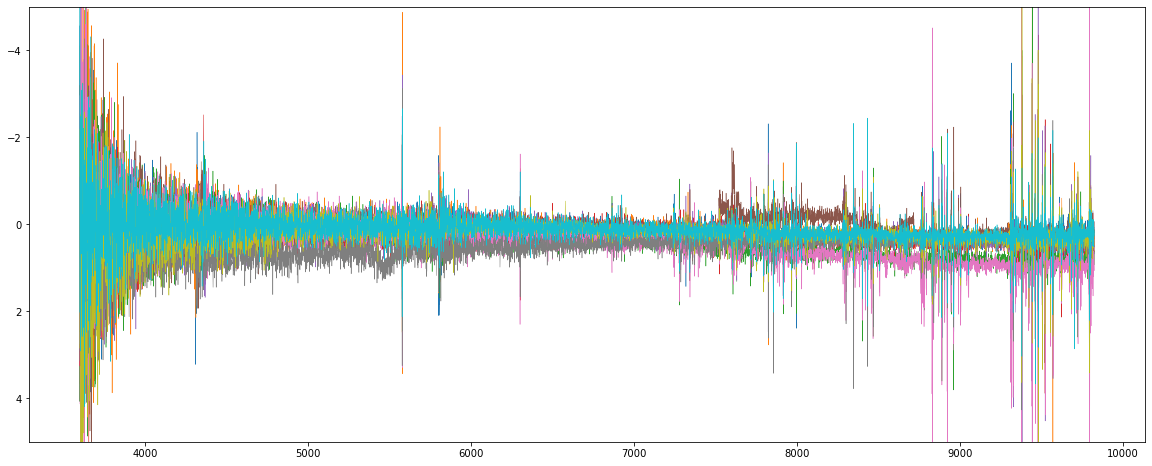

In [7]:
random_plot_spec(flux, wave, 10)

In [8]:
from importlib import reload
import sys
sys.path.append("../")

import stack_spectra
reload(stack_spectra)
import spectral_resampling 
reload(spectral_resampling)

<module 'spectral_resampling' from '../spectral_resampling.py'>

In [16]:
z_out = np.atleast_1d(0)
z_in = z
flux_new = stack_spectra._redshift(flux, z_in, z_out, "flux")
wave_new = stack_spectra._redshift(wave, z_in, z_out, "wave")
ivar_new = stack_spectra._redshift(ivar, z_in, z_out, "ivar")

In [22]:
wave_grid = np.arange(np.min(wave_new), np.max(wave_new), 0.8)

In [9]:
# wavegrid = np.arange(3000, 5000, 0.8)
flux_new, ivar_new, wave_new = stack_spectra._common_grid(flux,wave,ivar,z)

In [ ]:
index =3
p = figure(title="Spectra", x_axis_label='Wavelength', y_axis_label='Flux', plot_width=1000, plot_height=300, y_range=(-1, 1), tooltips=[('Flux', '$x'), ('Wavelength', '$y')])
p.line(wave_new, flux_new[index], legend_label="Temp.", line_width=2)
p.line(wave_new, convolve(flux_new[index],Gaussian1DKernel(2)), legend_label="Temp.", line_width=2, color="orange")

show(p)

In [ ]:
x = np.nanmean(flux_new/np.nanmedian(flux_new, axis=1, keepdims=True),axis=0)
from astropy.convolution import convolve, Box1DKernel
smoothed_signal = convolve(x, Box1DKernel(5))
random_plot_spec(x, wave_new)
plt.ylim(-5,5)
plt.xlim(3900,4000)

In [ ]:
random_plot_spec(flux_new, wave_new, 10)
plt.xlim(3000, 4000)